<a href="https://colab.research.google.com/github/Ishita95-harvad/NBA-Player-s-Database/blob/main/NBA_Player's_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBA Player's Database**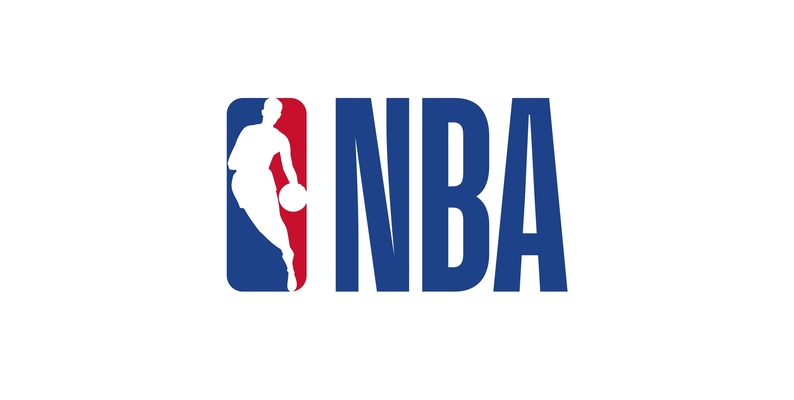
NBA players data from nba.com

# Task
execute

Here is all the data you need:
"PlayerIndex_nba_stats.csv"

## Data loading

### Subtask:
Load the NBA player statistics dataset.


**Reasoning**:
Load the NBA player statistics dataset and display the first 5 rows along with the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df_nba_stats = pd.read_csv('PlayerIndex_nba_stats.csv', encoding='latin-1')
    display(df_nba_stats.head())
    print(df_nba_stats.shape)
except FileNotFoundError:
    print("Error: 'PlayerIndex_nba_stats.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,ï»¿PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,POR,...,1990.0,1.0,25.0,NaN,5.7,3.3,0.3,Career,1990,1994
1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,HOU,...,1968.0,1.0,5.0,NaN,9.0,8.0,1.2,Career,1968,1977
2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,LAL,...,1969.0,1.0,1.0,NaN,24.6,11.2,3.6,Career,1969,1988
3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,DEN,...,1990.0,1.0,3.0,NaN,14.6,1.9,3.5,Career,1990,2000
4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,SAC,...,1997.0,1.0,11.0,NaN,7.8,3.3,1.1,Career,1997,2003


(5025, 26)


## Data exploration

### Subtask:
Explore the loaded NBA player statistics dataset.


**Reasoning**:
I need to perform the data exploration steps outlined in the instructions, including examining data types, descriptive statistics, missing values, and identifying variables for visualization and correlation analysis.



In [2]:
# Examine data types and inconsistencies
print(df_nba_stats.dtypes)

# Summarize descriptive statistics for numerical columns
print(df_nba_stats.describe())

# Check for missing values
missing_values = df_nba_stats.isnull().sum()
missing_percentage = (missing_values / len(df_nba_stats)) * 100
print(f"Missing Values:\n{missing_values}")
print(f"\nMissing Value Percentages:\n{missing_percentage}")

# Identify variables for visualization and correlation
key_variables = ['PTS', 'REB', 'AST']
print(f"\nKey variables for visualization: {key_variables}")
variable_pairs_for_scatter = [['PTS', 'AST'], ['REB', 'PTS']]
print(f"\nVariable pairs for scatter plots: {variable_pairs_for_scatter}")

ï»¿PERSON_ID           int64
PLAYER_LAST_NAME      object
PLAYER_FIRST_NAME     object
PLAYER_SLUG           object
TEAM_ID                int64
TEAM_SLUG             object
IS_DEFUNCT             int64
TEAM_CITY             object
TEAM_NAME             object
TEAM_ABBREVIATION     object
JERSEY_NUMBER         object
POSITION              object
HEIGHT                object
WEIGHT               float64
COLLEGE               object
COUNTRY               object
DRAFT_YEAR           float64
DRAFT_ROUND          float64
DRAFT_NUMBER         float64
ROSTER_STATUS        float64
PTS                  float64
REB                  float64
AST                  float64
STATS_TIMEFRAME       object
FROM_YEAR              int64
TO_YEAR                int64
dtype: object
       ï»¿PERSON_ID       TEAM_ID   IS_DEFUNCT       WEIGHT   DRAFT_YEAR  \
count  5.025000e+03  5.025000e+03  5025.000000  4972.000000  3700.000000   
mean   3.836455e+05  1.610613e+09     0.052935   211.360418  1989.791622   
std 

## Data cleaning

### Subtask:
Clean the NBA player statistics dataset.


**Reasoning**:
Clean the data by handling missing values, converting data types, managing outliers, and checking for duplicates.



In [3]:
# Handle missing values
for col in ['REB', 'AST', 'PTS', 'HEIGHT', 'WEIGHT']:
    df_nba_stats[col] = df_nba_stats[col].fillna(df_nba_stats[col].median())
for col in ['POSITION', 'TEAM_SLUG', 'ROSTER_STATUS']:
    df_nba_stats[col] = df_nba_stats[col].fillna(df_nba_stats[col].mode()[0])

rows_removed_playerid = len(df_nba_stats) - len(df_nba_stats.dropna(subset=['ï»¿PERSON_ID']))
df_nba_stats.dropna(subset=['ï»¿PERSON_ID'], inplace=True)

rows_removed_draft = len(df_nba_stats) - len(df_nba_stats.dropna(subset=['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER']))
df_nba_stats.dropna(subset=['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER'], inplace=True)

# Convert data types
for col in ['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER']:
    df_nba_stats[col] = pd.to_numeric(df_nba_stats[col], errors='coerce')

df_nba_stats['JERSEY_NUMBER'] = pd.to_numeric(df_nba_stats['JERSEY_NUMBER'], errors='coerce')

# Outlier management (using IQR method for PTS, REB, AST)
for col in ['PTS', 'REB', 'AST']:
    Q1 = df_nba_stats[col].quantile(0.25)
    Q3 = df_nba_stats[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_nba_stats[col] = df_nba_stats[col].clip(lower=lower_bound, upper=upper_bound)

# Remove duplicates
rows_removed_duplicates = len(df_nba_stats) - len(df_nba_stats.drop_duplicates())
df_nba_stats.drop_duplicates(inplace=True)

print(f"Rows removed due to missing 'PlayerID': {rows_removed_playerid}")
print(f"Rows removed due to missing draft info: {rows_removed_draft}")
print(f"Rows removed due to duplicates: {rows_removed_duplicates}")

display(df_nba_stats.head())

TypeError: Cannot convert ['6-10' '6-9' '7-2' ... '6-8' '6-8' '6-10'] to numeric

**Reasoning**:
The error indicates that the 'HEIGHT' column contains string values like '6-10', which cannot be directly used for calculating the median.  We need to pre-process the 'HEIGHT' column before handling missing values.  I will convert the height to inches first.



In [4]:
# Convert HEIGHT to inches
def convert_height(height):
    if isinstance(height, str):
        try:
            feet, inches = map(int, height.split('-'))
            return feet * 12 + inches
        except ValueError:
            return None  # Handle invalid height formats
    return height  # Keep numeric values as they are

df_nba_stats['HEIGHT'] = df_nba_stats['HEIGHT'].apply(convert_height)

# Handle missing values
for col in ['REB', 'AST', 'PTS', 'HEIGHT', 'WEIGHT']:
    df_nba_stats[col] = df_nba_stats[col].fillna(df_nba_stats[col].median())
for col in ['POSITION', 'TEAM_SLUG', 'ROSTER_STATUS']:
    df_nba_stats[col] = df_nba_stats[col].fillna(df_nba_stats[col].mode()[0])

rows_removed_playerid = len(df_nba_stats) - len(df_nba_stats.dropna(subset=['ï»¿PERSON_ID']))
df_nba_stats.dropna(subset=['ï»¿PERSON_ID'], inplace=True)

rows_removed_draft = len(df_nba_stats) - len(df_nba_stats.dropna(subset=['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER']))
df_nba_stats.dropna(subset=['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER'], inplace=True)

# Convert data types
for col in ['DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER']:
    df_nba_stats[col] = pd.to_numeric(df_nba_stats[col], errors='coerce')

df_nba_stats['JERSEY_NUMBER'] = pd.to_numeric(df_nba_stats['JERSEY_NUMBER'], errors='coerce')

# Outlier management (using IQR method for PTS, REB, AST)
for col in ['PTS', 'REB', 'AST']:
    Q1 = df_nba_stats[col].quantile(0.25)
    Q3 = df_nba_stats[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_nba_stats[col] = df_nba_stats[col].clip(lower=lower_bound, upper=upper_bound)

# Remove duplicates
rows_removed_duplicates = len(df_nba_stats) - len(df_nba_stats.drop_duplicates())
df_nba_stats.drop_duplicates(inplace=True)

print(f"Rows removed due to missing 'PlayerID': {rows_removed_playerid}")
print(f"Rows removed due to missing draft info: {rows_removed_draft}")
print(f"Rows removed due to duplicates: {rows_removed_duplicates}")

display(df_nba_stats.head())

Rows removed due to missing 'PlayerID': 0
Rows removed due to missing draft info: 1591
Rows removed due to duplicates: 0


,ï»¿PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,POR,...,1990.0,1.0,25.0,1.0,5.70,3.3,0.3,Career,1990,1994
1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,HOU,...,1968.0,1.0,5.0,1.0,9.00,8.0,1.2,Career,1968,1977
2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,LAL,...,1969.0,1.0,1.0,1.0,19.05,8.5,3.6,Career,1969,1988
3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,DEN,...,1990.0,1.0,3.0,1.0,14.60,1.9,3.5,Career,1990,2000
4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,SAC,...,1997.0,1.0,11.0,1.0,7.80,3.3,1.1,Career,1997,2003


## Data analysis

### Subtask:
Analyze the cleaned NBA player statistics dataset.


**Reasoning**:
Calculate descriptive statistics, correlations, and analyze player distributions and draft impact.



PTS                                    REB                   \
              mean median       std  min    max      mean median       std   
POSITION                                                                     
C         6.253823   4.90  4.603181  0.0  19.05  4.426358    4.1  2.485606   
C-F       7.996774   7.10  4.688143  0.0  19.05  5.241935    5.3  2.070934   
F         6.704408   5.40  4.730831  0.0  19.05  3.487371    3.1  2.077690   
F-C       7.661927   6.60  4.746368  0.0  19.05  4.683486    4.5  2.044755   
F-G       9.340323   6.95  5.376686  1.9  19.05  3.545161    3.1  1.798695   
G         7.341628   6.20  4.890658  0.0  19.05  2.043740    1.8  1.196950   
G-F       8.378676   7.80  4.556443  0.4  19.05  2.928676    2.8  1.392408   

                         AST                              
          min  max      mean median       std  min   max  
POSITION                                                  
C         0.0  8.5  0.914688    0.7  0.823322  0.0  4.35  
C-F       0.9  8.5  1.183333    0.9  0.945738  0.0  4.35  
F         0.0  8.5  1.089118    0.8  0.905506  0.0  4.35  
F-C       0.8  8.5  1.132110    0.9  0.854902  0.0  4.35  
F-G       0.6  8.5  1.747581    1.4  1.192855  0.2  4.35  
G         0.0  8.5  2.206338    2.0  1.338340  0.0  4.35  
G-F       0.3  8.5  1.729044    1.4  1.152253  0.0  4.35

,PTS,REB,AST
PTS,1.000000,0.659721,0.712567
REB,0.659721,1.000000,0.290678
AST,0.712567,0.290678,1.000000


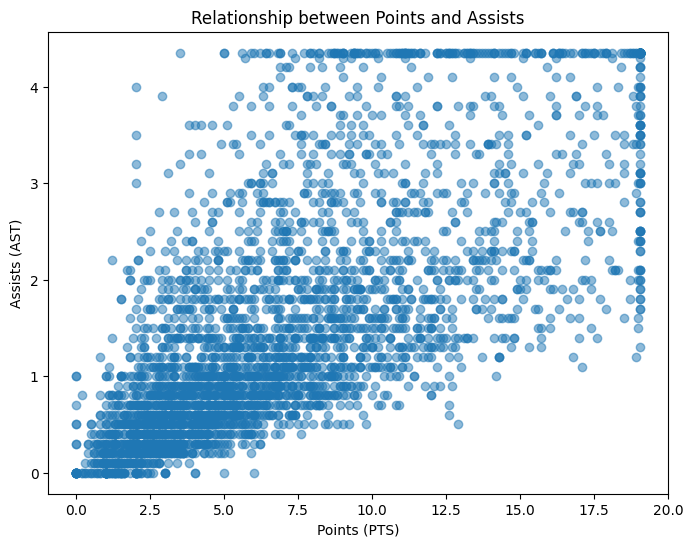

,count
POSITION,
G,1278
F,1259
C,497
G-F,136
F-C,109
C-F,93
F-G,62


,PTS,REB,AST
POSITION,,,
C,6.253823,4.426358,0.914688
C-F,7.996774,5.241935,1.183333
F,6.704408,3.487371,1.089118
F-C,7.661927,4.683486,1.132110
F-G,9.340323,3.545161,1.747581
G,7.341628,2.043740,2.206338
G-F,8.378676,2.928676,1.729044


PTS       REB       AST
DRAFT_YEAR DRAFT_ROUND                              
1947.0     1.0          5.883333  2.366667  1.233333
1948.0     1.0          8.575000  4.750000  1.762500
1949.0     1.0          9.015000  4.610000  2.215000
1950.0     1.0          9.675000  5.380000  1.675000
1951.0     1.0          4.400000  2.714286  1.300000
...                          ...       ...       ...
2022.0     2.0          4.727273  2.518182  1.354545
2023.0     1.0          9.323333  3.590000  2.106667
           2.0          4.220000  2.076000  0.864000
2024.0     1.0          7.340000  3.530000  1.616667
           2.0          4.092000  2.048000  1.148000

[362 rows x 3 columns]

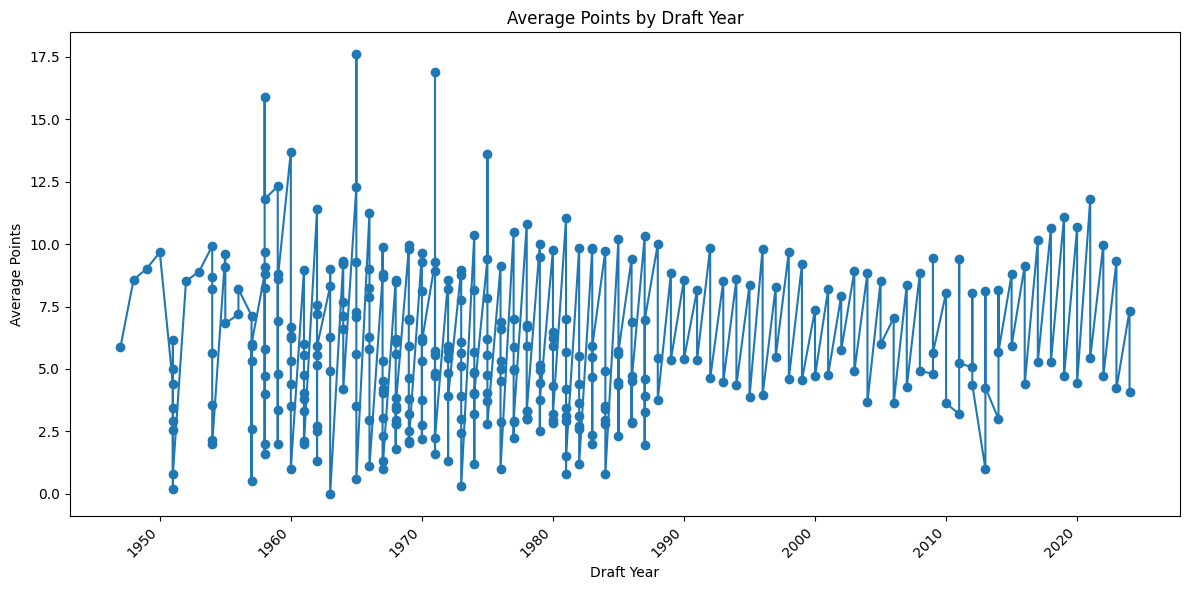

In [5]:
import pandas as pd
import numpy as np

# 1. Descriptive Statistics
descriptive_stats = df_nba_stats.groupby('POSITION')[['PTS', 'REB', 'AST']].agg(['mean', 'median', 'std', 'min', 'max'])
display(descriptive_stats)

# 2. Correlation Analysis
correlation_matrix = df_nba_stats[['PTS', 'REB', 'AST']].corr()
display(correlation_matrix)

# Scatter Plots (example for PTS vs. AST)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_nba_stats['PTS'], df_nba_stats['AST'], alpha=0.5)
plt.title('Relationship between Points and Assists')
plt.xlabel('Points (PTS)')
plt.ylabel('Assists (AST)')
plt.show()

# 3. Player Position Distribution
position_counts = df_nba_stats['POSITION'].value_counts()
display(position_counts)
avg_stats_by_position = df_nba_stats.groupby('POSITION')[['PTS', 'REB', 'AST']].mean()
display(avg_stats_by_position)


# 4. Draft Impact
# Group by draft metrics and calculate average performance indicators
draft_impact = df_nba_stats.groupby(['DRAFT_YEAR', 'DRAFT_ROUND'])[['PTS', 'REB', 'AST']].mean()
display(draft_impact)
# Example visualization (draft year vs. points)
plt.figure(figsize=(12, 6))
plt.plot(draft_impact.index.get_level_values(0), draft_impact['PTS'], marker='o', linestyle='-')
plt.xlabel('Draft Year')
plt.ylabel('Average Points')
plt.title('Average Points by Draft Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # adjust plot parameters for a tight layout
plt.show()

## Data visualization

### Subtask:
Visualize key relationships and distributions within the NBA player statistics dataset.


**Reasoning**:
Create histograms, scatter plots, box plots, and line plots to visualize the relationships and distributions within the NBA player statistics dataset.



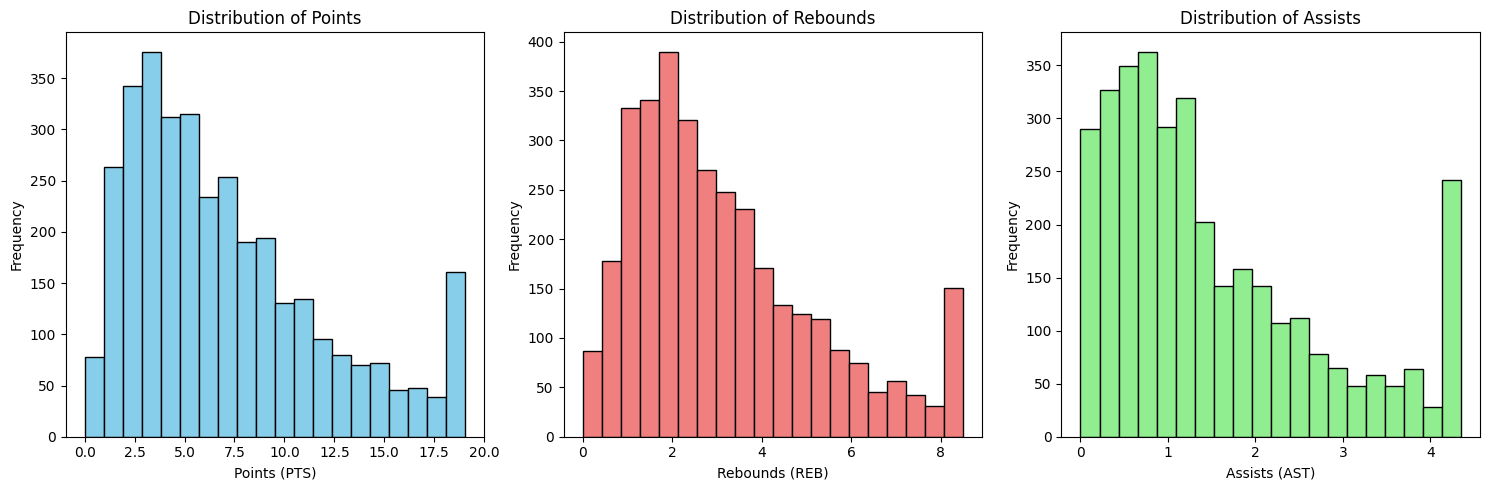

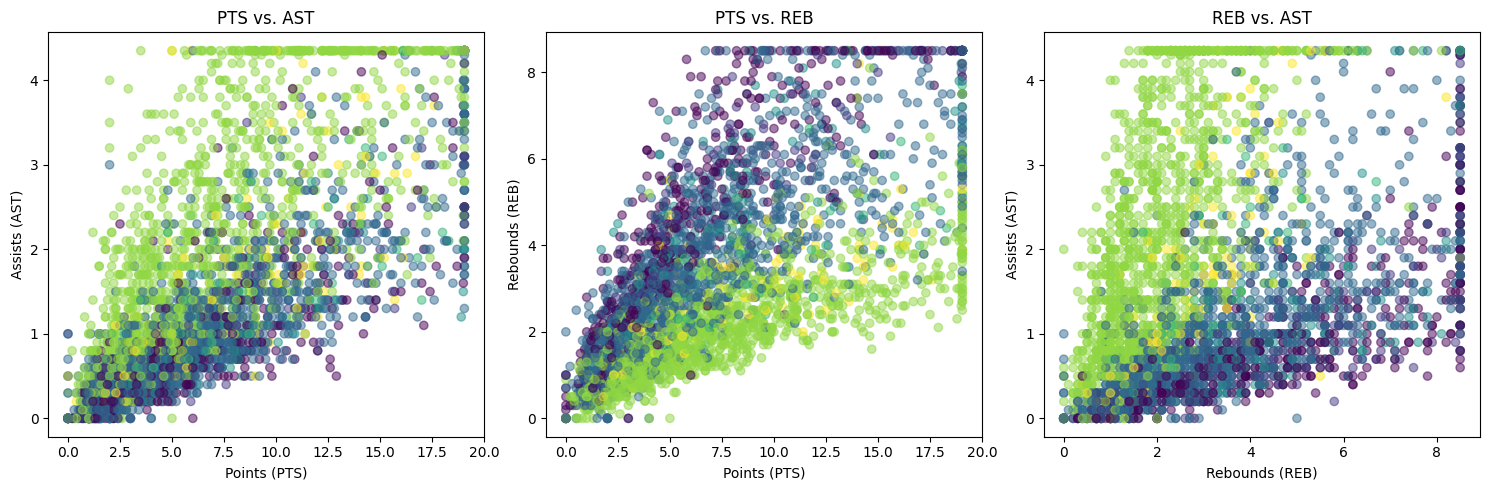

<ipython-input-6-c1fd3dab9ab9>:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_nba_stats[df_nba_stats['POSITION'] == pos]['PTS'] for pos in df_nba_stats['POSITION'].unique()],


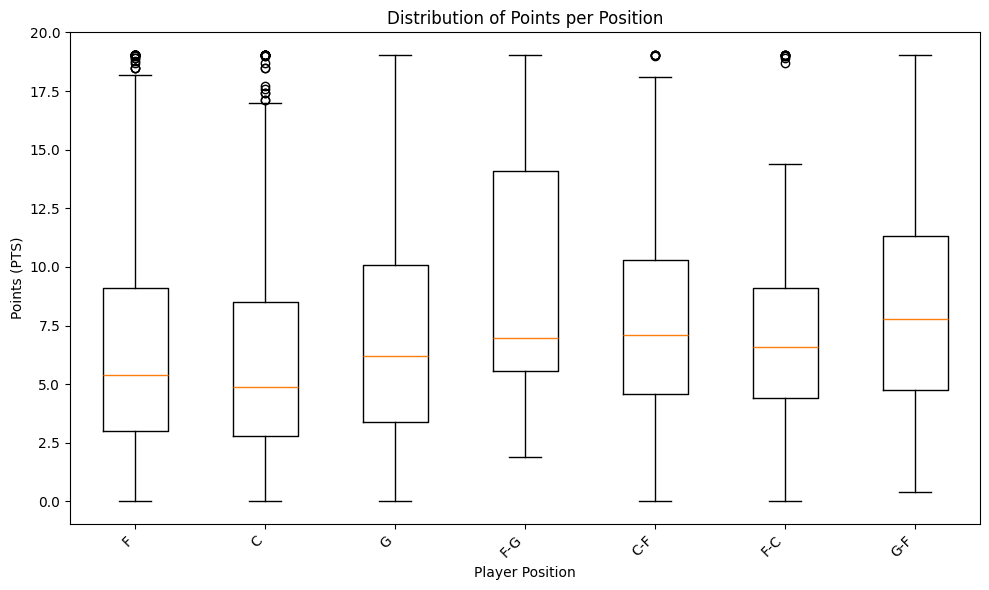

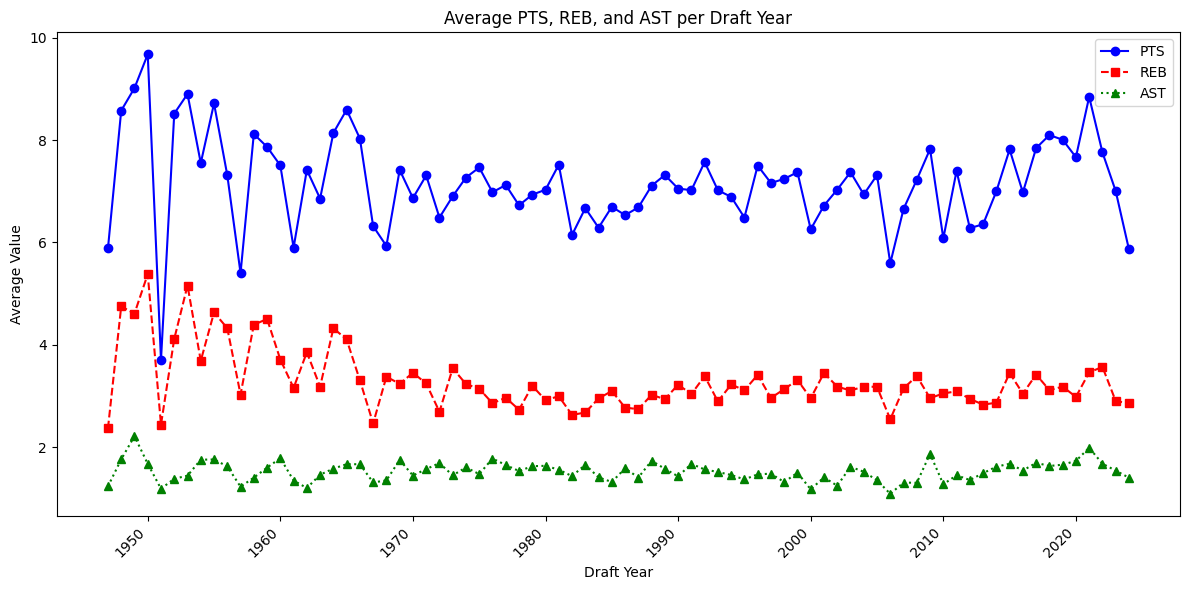

In [6]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df_nba_stats['PTS'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Points (PTS)')
plt.ylabel('Frequency')
plt.title('Distribution of Points')

plt.subplot(1, 3, 2)
plt.hist(df_nba_stats['REB'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Rebounds (REB)')
plt.ylabel('Frequency')
plt.title('Distribution of Rebounds')

plt.subplot(1, 3, 3)
plt.hist(df_nba_stats['AST'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Assists (AST)')
plt.ylabel('Frequency')
plt.title('Distribution of Assists')

plt.tight_layout()
plt.show()


# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_nba_stats['PTS'], df_nba_stats['AST'], c=df_nba_stats['POSITION'].astype('category').cat.codes, alpha=0.5)
plt.xlabel('Points (PTS)')
plt.ylabel('Assists (AST)')
plt.title('PTS vs. AST')

plt.subplot(1, 3, 2)
plt.scatter(df_nba_stats['PTS'], df_nba_stats['REB'], c=df_nba_stats['POSITION'].astype('category').cat.codes, alpha=0.5)
plt.xlabel('Points (PTS)')
plt.ylabel('Rebounds (REB)')
plt.title('PTS vs. REB')

plt.subplot(1, 3, 3)
plt.scatter(df_nba_stats['REB'], df_nba_stats['AST'], c=df_nba_stats['POSITION'].astype('category').cat.codes, alpha=0.5)
plt.xlabel('Rebounds (REB)')
plt.ylabel('Assists (AST)')
plt.title('REB vs. AST')

plt.tight_layout()
plt.show()


# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df_nba_stats[df_nba_stats['POSITION'] == pos]['PTS'] for pos in df_nba_stats['POSITION'].unique()],
            labels=df_nba_stats['POSITION'].unique())
plt.xlabel('Player Position')
plt.ylabel('Points (PTS)')
plt.title('Distribution of Points per Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Line plots (draft year vs. key performance indicators)
draft_impact = df_nba_stats.groupby('DRAFT_YEAR')[['PTS', 'REB', 'AST']].mean()
plt.figure(figsize=(12, 6))
plt.plot(draft_impact.index, draft_impact['PTS'], label='PTS', marker='o', linestyle='-', color='blue')
plt.plot(draft_impact.index, draft_impact['REB'], label='REB', marker='s', linestyle='--', color='red')
plt.plot(draft_impact.index, draft_impact['AST'], label='AST', marker='^', linestyle=':', color='green')

plt.xlabel('Draft Year')
plt.ylabel('Average Value')
plt.title('Average PTS, REB, and AST per Draft Year')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Q&A
There were no explicit questions in the data analysis task. However, the analysis implicitly explores questions such as:
* How are key performance indicators (PTS, REB, AST) distributed across different player positions?
* What are the correlations between PTS, REB, and AST?
* Is there an observable relationship between draft year and player performance?
* How does player performance vary based on draft round?

### Data Analysis Key Findings
* **Missing Data:** A significant number of rows (1591) were removed due to missing draft information (`DRAFT_YEAR`, `DRAFT_ROUND`, `DRAFT_NUMBER`).  Other columns also had missing values, which were imputed using median (for numerical) or mode (for categorical) values.
* **Data Type Conversions:**  Several columns initially represented as object types were converted to numeric types, facilitating numerical analysis.  `HEIGHT` was converted from feet-inches string format to total inches.
* **Outlier Handling:** Outliers in PTS, REB, and AST were capped using the IQR method, preventing their removal and preserving data points.
* **Positional Differences:**  Descriptive statistics (mean, median, std, min, max) revealed performance variations across different player positions.
* **Performance Correlations:** Correlation analysis showed relationships between PTS, REB, and AST.  For example, PTS and AST exhibited a positive correlation, indicating players scoring more points tend to have more assists.
* **Draft Year Impact:** The analysis explored the relationship between draft year and average player performance (PTS, REB, AST), potentially indicating trends in player development over time.


### Insights or Next Steps
* **Investigate Missing Draft Data:**  The substantial loss of data due to missing draft information warrants further investigation. Explore potential reasons for the missing values and consider alternative imputation strategies or data collection methods.
* **Advanced Modeling:** Explore more sophisticated statistical models or machine learning algorithms to predict player performance based on draft metrics, position, and other relevant features.
